SpM
=============

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
#import sys
#sys.path.append("../../admmsolver/src/")

In [4]:
from spm_omega import AnaContSmooth, AnaContSpM

import numpy as np
import sparse_ir
from sparse_ir import FiniteTempBasis, MatsubaraSampling, TauSampling
import pytest


%matplotlib inline
from matplotlib import pyplot as plt


In [5]:
wmax = 4.0
beta = 100.0
lambda_ = wmax * beta
basis = sparse_ir.FiniteTempBasis("F", beta, wmax, eps=1e-12)

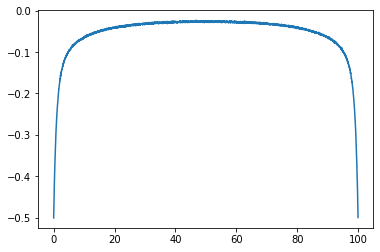

In [6]:
gtau = np.loadtxt("Gtau.in")[:,1]
tau = np.linspace(0, beta, gtau.size)
plt.plot(tau, gtau)

In [21]:
moment = np.ones((1,1))
solver = AnaContSpM(beta, wmax, "F", "time", tau, moment=moment)

In [23]:
alpha = 1e-4
x, info = solver.solve(gtau[:,None,None], alpha, niter=1000, spd=True)

sua_full (4001, 59)


In [24]:
nomega = 1000
omega = np.linspace(-wmax, wmax, nomega)
rho_omega = solver.rho_omega(x, omega)

/usr/local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


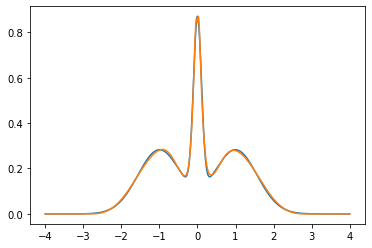

In [26]:
data = np.loadtxt("Gtau.in.dos")
omega_ref = data[:,0]
rho_omega_ref = data[:,1]

plt.plot(omega_ref, rho_omega_ref[:], label="Ref")
plt.plot(omega, rho_omega[:,0,0], label="reconstructed")
plt.legend()